## Final Project Submission

Please fill out:
* Student name: Nicholas Green
* Student pace: 40 week / part time
* Scheduled project review date/time: 12/13/2021 @4pm 
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://medium.com/@greennicholas62/guided-sql-practice-bc223af5c4ff


# Overview
<p>Microsoft wants to unveil a video streaming service the likes of Netflix, including original movies. We in tech know it is preferrable to work smarter instead of harder, so we are making educated decisions when it comes to our service. I have compiled data from IMDb and Box Office Mojo then utilized descriptive statistics in order to best deduce how we should produce our media. As a result, I believe it is best for our original movies, to make movies that appeal to markets home and abroad, emulating the most popular types of movies, and contract with the most successful studios. <p/>

# Business Problem
<p> I will say it truthfully, we are not movie producers. Thanks to data however, we know what people like and therefore what to aim for when framing our service. Just as data is perfect for answering questions regarding quantity, who, or what, it is also well suited for breaking down consumer preference and understanding markets.<p/>

# Customer Preferences Data Can Answer
<p>
    <ul style="list-file-type:square">
    <li>The groups for whom to make movies.
    <li>What genres people prefer.
    <li>Who people trust in moviemaking.
<ul/>
<p/>

# Data Understanding

## Where I Derived My Data and Why It's Useful:
<p>
<ul style="list-file-type:square">
<li> IMDb- Online database of information related to films, television, and more. Respected standard for media judgement.
<li> Box Office Mojo- American website for tracking box-office revenue. Does so systematically through algorithms.
<ul/>
<p/>
    

## Who My Data Represents, What Is Included, What It Answers
<p>
I took a look at studio's domestic and foreign success in the movie industry in order to find what would encompass the global market. I investigated how much films grossed domestically, internationally, and by whom made those successes. Just as importantly, through cross referencing two IMDb datasets, I concluded which types of movies are most popular, using only established sample sizes.
<p/>

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading our data
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

#Little peek into the data
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
#Examine the number of rows
len(title_basics)

146144

In [4]:
#Drop any rows with NaNs
title_basics.dropna(inplace=True)

#See what is left over
len(title_basics)

112232

In [5]:
title_basics.describe()

,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


In [6]:
#Loading our second piece of data
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

#Gathering insight
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
#No Nulls, but also not much information
#Let's take a closer look at what we have
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [8]:
#It looks like numvotes represents our sample sizes, too small of samples lead to skewing
#In statistics, 30 is a good sample size to better follow a normal distribution
title_ratings = title_ratings[title_ratings['numvotes'] >= 30]

In [9]:
title_ratings['numvotes'].describe()

count    4.374000e+04
mean     5.940770e+03
std      3.918279e+04
min      3.000000e+01
25%      6.900000e+01
50%      1.950000e+02
75%      7.840000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [10]:
#Looks like our data has been cleaned pretty well
#The min is now 30 people, the bigger the sample size the more accurate the data
#Now let's see if we can combine our two cleaned dataframes using 'tconst' to give us usable info
basic_ratings = pd.merge(title_basics, title_ratings, on='tconst')
basic_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
41374,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
41375,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
41376,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
41377,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365


In [11]:
#Awesome, we are cuious to see how runtime affects ratings, so let's see what we are working with
basic_ratings['runtime_minutes'].describe()

count    41379.000000
mean        98.477029
std         74.164744
min          8.000000
25%         86.000000
50%         94.000000
75%        107.000000
max      14400.000000
Name: runtime_minutes, dtype: float64

In [12]:
#looks like there are extremes on both sides that are influencing the mean and std
#Let's cut off reasonable at reasonable time limits
#Nothing more than 3.5 hours or less than a half hour
basic_ratings = basic_ratings[(basic_ratings['runtime_minutes'] > 30.0) & (basic_ratings['runtime_minutes'] < 210.0)]

#Let's see how it changes things
basic_ratings['runtime_minutes'].describe()

count    41276.000000
mean        97.806377
std         20.314558
min         32.000000
25%         86.000000
50%         94.000000
75%        107.000000
max        208.000000
Name: runtime_minutes, dtype: float64

<ul style="list-file-type:square">
<li>The mean was not changed significantly, but the standard deviation changed drastically. What used to be as long as a movie itself is now a more meaningful measure of distribution
<ul/>

In [13]:
#Let's move on to our third piece of data
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
#This is for measuring how well movies grossed domestic and foreignly
#Take a better look
movie_gross.info()
movie_gross['domestic_gross'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [15]:
#Seems like there are NaNs here too, let's drop them
movie_gross.dropna(inplace=True)

#The mean and std of domestic gross should also change somewhat
movie_gross.info()
movie_gross['domestic_gross'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


count    2.007000e+03
mean     4.701984e+07
std      8.162689e+07
min      4.000000e+02
25%      6.700000e+05
50%      1.670000e+07
75%      5.605000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [16]:
#It looks like foreign gross is not a float
#Still, movies that do well at home could also resonate well with other countries
gross_top50 = movie_gross.sort_values('domestic_gross', ascending=False).head(50)
gross_top50

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [17]:
#Now I have a descending list of the top 50 domestic grossing films
#In most cases, wherever the domestic gross is high the foreign is as well
#Let's omit the rows with non float foreign values for future interpretation 
gross_top46 = gross_top50.sort_values('foreign_gross', ascending=False).head(46)
gross_top46

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
1127,Frozen,BV,400700000.0,875700000,2013
1876,Minions,Uni.,336000000.0,823400000,2015
3083,Aquaman,WB,335100000.0,812700000,2018
1128,Iron Man 3,BV,409000000.0,805800000,2013
728,Skyfall,Sony,304400000.0,804200000,2012
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,2011


In [18]:
#Now the list contains the top 46 domestic grossing films but now ordered by their foregin grossings
#The list should make more sense now, it is unfeasible that a film could only gross 1,131.6 foreignly
#Let's convert all foreign gross values now to something graphable
gross_top46['foreign_gross'] = gross_top46['foreign_gross'].astype(float)

In [19]:
#I'm also curious to see which single genre produces the best average rating
genres=['Action', 'Drama', 'Comedy', 'Animation', 'Horror', 'Documentary']

#I will iterate over my genres to quickly get the data I am looking for
genre_means = lambda genre: basic_ratings[basic_ratings['genres'] == genre].mean()

for i in genres:
    print(i)
    print(genre_means(i))

Action
start_year         2014.387244
runtime_minutes     106.829157
averagerating         5.324829
numvotes            718.665148
dtype: float64
Drama
start_year         2014.194130
runtime_minutes      99.592120
averagerating         6.381512
numvotes           1321.025522
dtype: float64
Comedy
start_year         2014.392959
runtime_minutes      97.827783
averagerating         5.527434
numvotes           2138.413892
dtype: float64
Animation
start_year         2014.838028
runtime_minutes      83.725352
averagerating         5.926761
numvotes            154.697183
dtype: float64
Horror
start_year         2014.439232
runtime_minutes      87.711443
averagerating         4.421677
numvotes           1107.928927
dtype: float64
Documentary
start_year         2014.496222
runtime_minutes      86.214106
averagerating         7.143185
numvotes            466.831234
dtype: float64


In [20]:
#Now let's make a list of the average reviews
avg_reviews=[5.324829, 6.381512, 5.527434, 5.926761, 4.421677, 7.143185]

In [21]:
#Building on that, make a dictionary out of Genre and Ratings
genre_ratings = {'Genre': genres,
                 'AverageRating': avg_reviews}

#Lastly, we will make a Data Frame out of it for graphical interpretation
genre_ratings_df = pd.DataFrame(genre_ratings)

genre_ratings_df

,Genre,AverageRating
0,Action,5.324829
1,Drama,6.381512
2,Comedy,5.527434
3,Animation,5.926761
4,Horror,4.421677
5,Documentary,7.143185


# Possible Data Limitation

<p>
    The data included does an adequate job for confident interpretation. That is not to mean that it is black and white however. In movie grossing for example, a movie's quality is important in how well it does, but a potential confounding variable may be marketing involved for the release of the movie. Meaning a movie could have been hyped up at release causing good ticket sales.
<p/>


# Data Modeling


In [22]:
#I am first setting the dimensions for the graphs
plt.rcParams['figure.figsize'] = (10,4)

Text(0.5, 1.0, 'Studios with Movies in Top 46 Domestically')

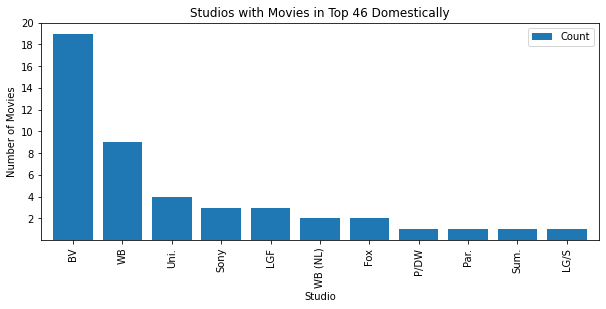

In [23]:
#Plotting to see which studios made the best performing movies
axes=plt.axes()
gross_top46['studio'].value_counts().plot.bar(width=0.8, label='Count').set_yticks([2,4,6,8,10,12,14,16,18,20])

plt.legend()
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Studios with Movies in Top 46 Domestically')

Text(0.5, 1.0, 'Domestic and Foriegn Grossing')

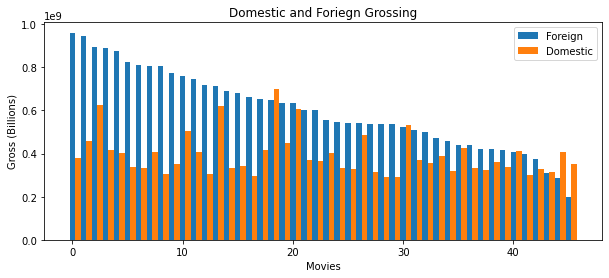

In [24]:
#Now comparing how much films grossed domestically vs foreignly 
plt.bar(np.arange(len(gross_top46['foreign_gross'])), gross_top46['foreign_gross'], width=0.5, label='Foreign')
plt.bar(np.arange(len(gross_top46['domestic_gross']))+ 0.5, gross_top46['domestic_gross'], width=0.5, label='Domestic')

plt.legend()
plt.xlabel('Movies')
plt.ylabel('Gross (Billions)')
plt.title('Domestic and Foriegn Grossing')

array([[1.        , 0.27271118],
       [0.27271118, 1.        ]])

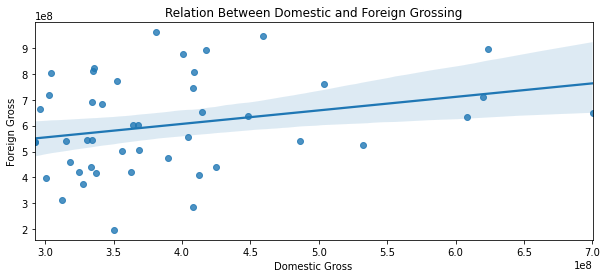

In [25]:
#Taking this further, what is the relatinship between domestic and foreign grossing
#Could domestic gross be an indicator for foreign gross
sns.regplot(x=gross_top46['domestic_gross'], y=gross_top46['foreign_gross'])

plt.title('Relation Between Domestic and Foreign Grossing')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
np.corrcoef(gross_top46['domestic_gross'], gross_top46['foreign_gross'])

Text(0.5, 0, 'Average Rating')

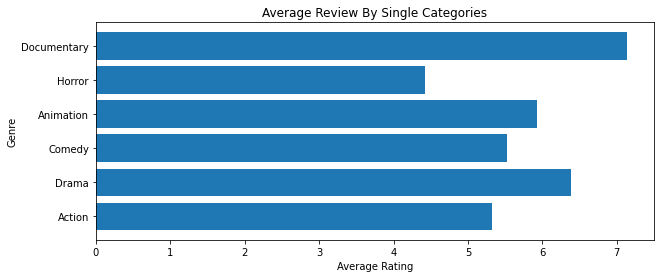

In [26]:
#Now let's see a visual for our individual genres vs ratings
plt.barh(data= genre_ratings_df, y='Genre', width='AverageRating', height=0.8)

plt.title('Average Review By Single Categories')
plt.ylabel('Genre')
plt.xlabel('Average Rating')

Text(0.5, 0, 'Ratings')

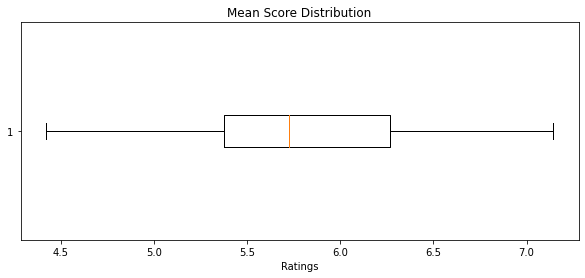

In [27]:
#Now let's see how these genres spread out their ratings
plt.boxplot(genre_ratings_df['AverageRating'], vert= False)

plt.title('Mean Score Distribution')
plt.xlabel('Ratings')

In [28]:
#This last part is extra, but let's see what genres the top movies were
mean_ratings_top50 = basic_ratings.groupby('genres').mean().sort_values('averagerating', ascending=False).head(50)
mean_ratings_top50

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Action,Documentary,Family",2014.000000,66.000000,9.200000,44.000000
"Adventure,Documentary,Western",2012.000000,77.000000,9.200000,73.000000
"Action,Adventure,Musical",2018.000000,97.000000,8.700000,42.000000
"Mystery,News,Thriller",2019.000000,88.000000,8.400000,92.000000
"Animation,Documentary,Family",2010.000000,85.000000,8.400000,47.000000
"Documentary,Drama,Thriller",2016.000000,98.000000,8.400000,69.000000
"Documentary,Music,War",2016.000000,85.500000,8.400000,223.750000
"Biography,Family,History",2015.000000,108.000000,8.300000,49.000000
"Comedy,History,Musical",2016.000000,134.000000,8.300000,172.000000


# Conclusion
<p>
    As stated before, I was curious as to see what movies performed well domestic and foreignly, what genres of movies did best, and by whom made successes. 
    In my analysis, I concluded that the top movies who had done well domestically also did well internationally. That means that the markets overeas are comparable, and suggests a relationship between movies doing well in the states and then also foreignly. 
    While studying movie genres in relation to veiwer satisfaction, I concluded that movies of a single type recieve average scores with a center of about 5.75 out of 10, and a spread of about 1.2. On the other hand, multifaceted movies, movies with more than one genre, made up the entirety of the top 50 rated films. These findings suggest that viewers prefer movies with more than one edge. 
    Lastly, in regards to whom made the most successful movies, I counted the number of times studios appered on the top 46 grossing movies list. The data was clear in who made the most blockbusters, that being studio BV who made 19 of 46 top places or next place WB, with 9. 
<p/>

# Recommendations
 <ul>
    <li> Make movies that work domestically, they will likely fair even better internationally.
        <li>Produce or list movies with dynamic plots and multiple genres.
            <li>Contract with first pick studio BV or the second place, WB.
                <ul/>
    
